In [11]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
from tqdm import tqdm, notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [13]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(25,7)})

Get the path to retrieve data from local folder

In [11]:
#Jules: 
#Small sample
path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/'

#Big sample
#path = r'C:\Users\jules\kDrive\onedrive\Documents_Onedrive\EPFL\MA3\ADA\Project\Dataset\BIG_SAMPLE'

#### Using the provided csv file to link qids with meaningful names for speakers metadata

In [12]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

## Speakers Aggregation

### Import quotes data

In [ ]:
#Retrieve the dataset containing all speakers with the fraction of the colloquial language 
#Import the speakers metadata
#path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/'
#file_path = path+'Sample_2020_classified.json.bz2'

path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/'
file_path = path+'Sample_classified_1Mio_v1.json.bz2'

df_quotes =  pd.read_json(file_path,compression = 'bz2',lines = True)

### Import american politicians data

In [ ]:
path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/polUS_speakers/'
file_path = path +''
df_speakers =  pd.read_json(file_path,compression = 'bz2',lines = True)

### Group the qi by speaker

In [9]:
#Create sub-sample
df_sub = df_quotes.sample(int(1*10e3))
#df_sub = df_quotes.copy()
df_sub.drop_na(inplace=True,subset=['qids'])
s1 = len(df_sub)

#For the moment, choose rows which at minimum 1 qid associated
#Remove this row when using the data that have been wrangled
df_sub = df_sub[[len(a)>0 for a in df_sub['qids']]]

s2 = len(df_sub)

print('There is {} % of rows that have no qid associated with (on {} rows)'.format((1-s2/s1)*100,s1))

#Choose the first QID that is associated with (to be improved)
df_sub['qid_unique'] = df_sub['qids'].apply(lambda x: x[0]) 

NameError: name 'df_quotes' is not defined

In [ ]:
#Perform a group_by on quotations by speaker 
df_grouped = df_sub.groupby(['qid_unique', 'colloquial']).size().unstack(fill_value=0).reset_index()
df_grouped['quotes_number'] = df_grouped[1]+df_grouped[0]
df_grouped.sort_values(['quotes_number'], ascending=False) 

# Create also a column (called "fraction") that computes the fraction of colloquial quotes over total quotations. (by speaker)
df_grouped['fraction']=df_grouped[1]/(df_grouped['quotes_number'])
df_grouped.reset_index().sort_values(['fraction'], ascending=False)

### Merge quotes with speakers metadata

In [ ]:
#Merging with metadata

df_merged = df_grouped.merge(df_speakers,how='inner',left_on='qid_unique', right_on='id').sort_values(['quotes_number'], ascending=False)

## Statistics

### Plot the distribution of colloquial language speaker in political party

[Text(0, 0.5, 'Average fraction of colloquial quotations')]

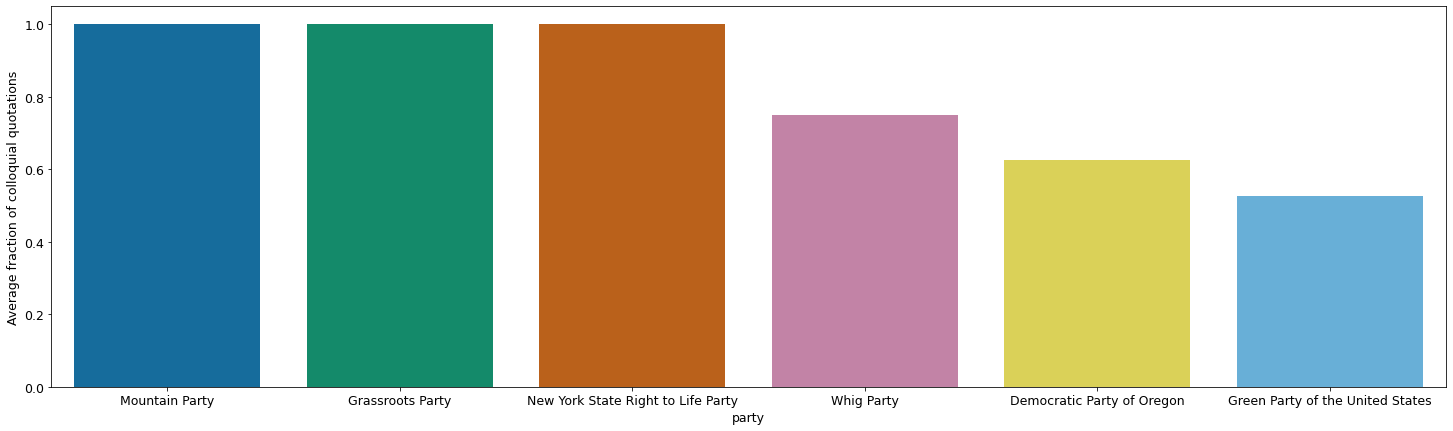

In [18]:

df_party=df_polUS_2.copy()
#Replace label column at the first place to see speakers names
df_party.dropna(axis = 0, subset=['party'], inplace=True)

#Drop all speakers that several parties
oneparty_cond = df_party['party'].apply(lambda x: len(x)==1)

#Transforma a list into one element
df_party['party'] = df_party['party'].apply(lambda x: x[0]) 

df_party = df_party[oneparty_cond]

#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)
df_plot = df_party.groupby('party')['fraction'].mean() \
           .reset_index(name='mean_fraction')\
            .sort_values(['mean_fraction'], ascending=False)
#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)

#df_plot = df_plot[df_plot['mean_fraction']!=1]
df_plot['party'] = df_plot['party'].apply(lambda x: df_lookup.loc[x]['Label'])

ax = sns.barplot(x='party', y="mean_fraction", data=df_plot[:6])
ax.set(ylabel='Average fraction of colloquial quotations')

In [19]:
print("There are {} parties in our dataset".format(len(df_plot)))

There are 62 parties in our dataset
